In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the datasets
customers = pd.read_csv("C:/Users/deepa/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/deepa/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/deepa/Downloads/Transactions.csv")

In [13]:
# Display basic information
print("Customers Data:")
print(customers.info())
print(customers.head())

print("\nProducts Data:")
print(products.info())
print(products.head())

print("\nTransactions Data:")
print(transactions.info())
print(transactions.head())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    10

In [15]:
# Check for missing values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("\nProducts:")
print(products.isnull().sum())
print("\nTransactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [17]:
# Check for duplicates
print("\nDuplicate Rows:")
print(f"Customers: {customers.duplicated().sum()}")
print(f"Products: {products.duplicated().sum()}")
print(f"Transactions: {transactions.duplicated().sum()}")


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [19]:
# Convert columns to appropriate data types
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [21]:
# Merge datasets for EDA
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [25]:
# Explore data
def plot_customer_distribution():
    plt.figure(figsize=(8, 5))
    region_counts = customers['Region'].value_counts()
    sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.show()

def plot_transaction_trends():
    plt.figure(figsize=(10, 6))
    transactions_by_date = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()
    transactions_by_date.plot(marker='o', color='blue')
    plt.title('Monthly Transaction Volume')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.grid(True)
    plt.show()

def top_products_by_sales():
    top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Total Sales (USD)')
    plt.ylabel('Product Name')
    plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_17324\2866673403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


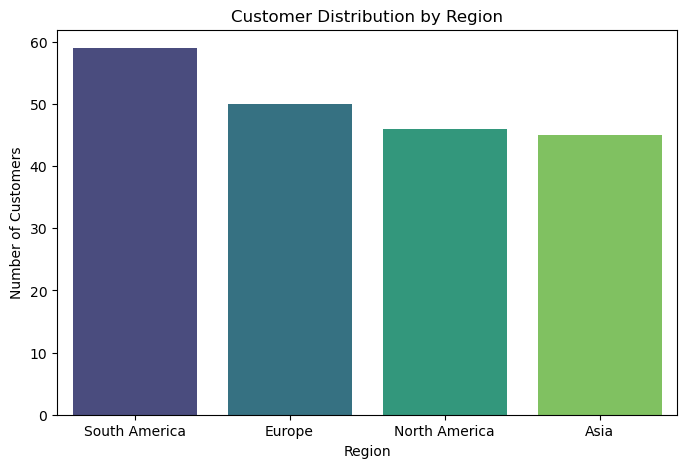

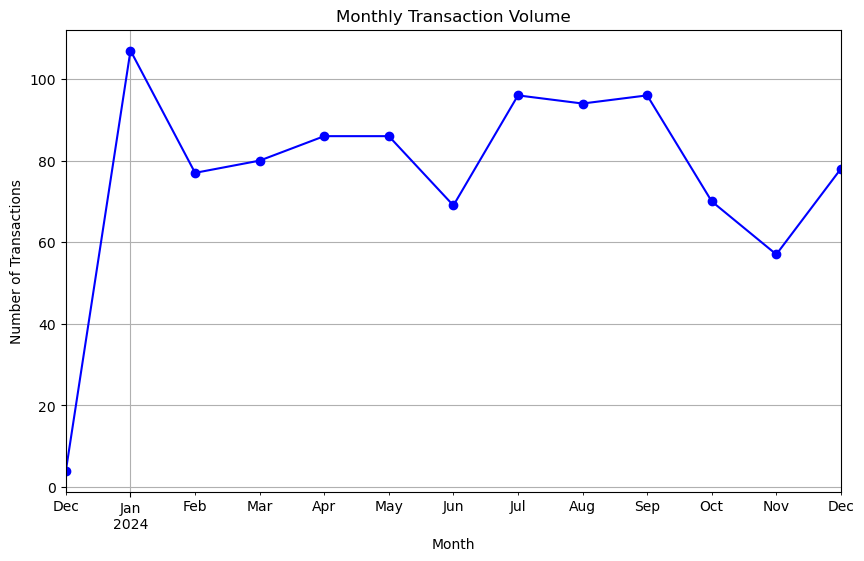

C:\Users\deepa\AppData\Local\Temp\ipykernel_17324\2866673403.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


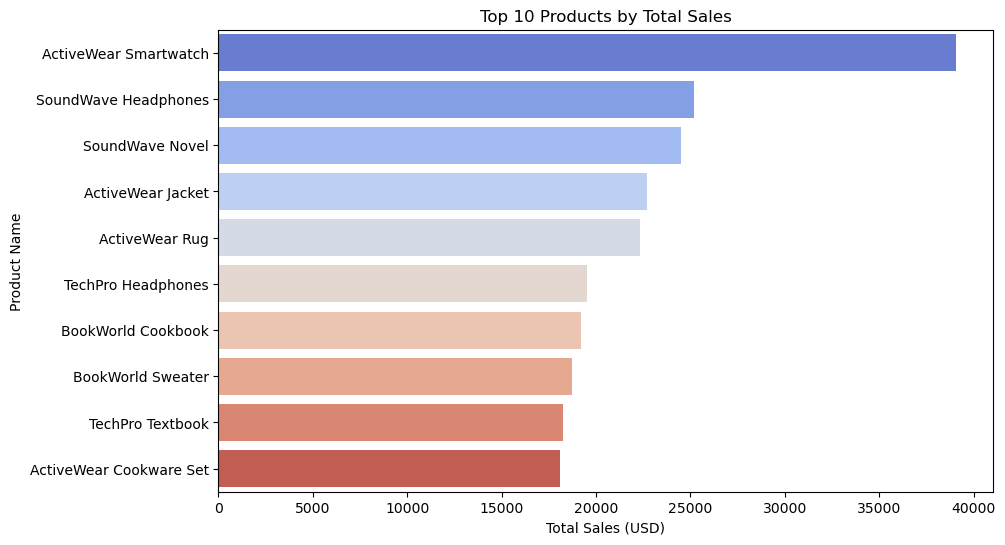

In [27]:
# Generate plots
plot_customer_distribution()
plot_transaction_trends()
top_products_by_sales()

In [29]:
# Business Insights
insights = [
    "1. Most customers are concentrated in specific regions, which helps target region-specific campaigns.",
    "2. Monthly transaction trends reveal seasonal peaks, suggesting promotional activities during high-demand periods.",
    "3. A few products contribute disproportionately to revenue, indicating a potential to expand the high-performing product line.",
    "4. The majority of transactions involve small product quantities, highlighting a preference for single or low-volume purchases.",
    "5. Customers signing up in the recent past are more active, suggesting a need to re-engage older customers."
]

In [31]:
for i, insight in enumerate(insights, 1):
    print(f"Insight {i}: {insight}")

Insight 1: 1. Most customers are concentrated in specific regions, which helps target region-specific campaigns.
Insight 2: 2. Monthly transaction trends reveal seasonal peaks, suggesting promotional activities during high-demand periods.
Insight 3: 3. A few products contribute disproportionately to revenue, indicating a potential to expand the high-performing product line.
Insight 4: 4. The majority of transactions involve small product quantities, highlighting a preference for single or low-volume purchases.
Insight 5: 5. Customers signing up in the recent past are more active, suggesting a need to re-engage older customers.
